In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
data =pd.read_csv('bank/bank.csv',sep=';')

   ## About Data
   
   The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 
   
   #####   **The classification goal is to predict if the client will subscribe a term deposit (variable y).**

In [3]:
# About Data
print('Total Data points: ',len(data))
print('\nBlank or Null Values\n',data.isnull().sum(),sep='')

Total Data points:  4521

Blank or Null Values
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [4]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [111]:
col_cat = ['job','marital','education','default','housing','loan','contact','month','poutcome']
col_num = ['age','balance','day','duration','campaign','pdays','previous']

   ## Data Description
   
   ### Bank client data:
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
                                       
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric) 
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")
  
  ### Related with the last contact of the current campaign:
   
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
  
  ### Other attributes:
  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")


  ### Output variable (desired target):
  
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")


In [5]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
col_num
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
round(data.describe(),2)

,age,balance,day,duration,campaign,pdays,previous
count,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00
mean,41.17,1422.66,15.92,263.96,2.79,39.77,0.54
std,10.58,3009.64,8.25,259.86,3.11,100.12,1.69
min,19.00,-3313.00,1.00,4.00,1.00,-1.00,0.00
25%,33.00,69.00,9.00,104.00,1.00,-1.00,0.00
50%,39.00,444.00,16.00,185.00,2.00,-1.00,0.00
75%,49.00,1480.00,21.00,329.00,3.00,-1.00,0.00
max,87.00,71188.00,31.00,3025.00,50.00,871.00,25.00


In [8]:
data['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [18]:
data_gp = data.groupby('y')
print('** Values are in percentage\n',)
for a in data.columns[:-1]:
    if data[a].dtypes == 'object':
        print(round((data[a].value_counts(sort=True))*100/len(data),2),end='\n\n',sep='')
        print(round(data_gp[a].value_counts(sort=False,normalize=True)*100,2))        
        print('\n\n\n---------------------------------')
        
        

** Values are in percentage

management       21.43
blue-collar      20.92
technician       16.99
admin.           10.57
services          9.22
retired           5.09
self-employed     4.05
entrepreneur      3.72
unemployed        2.83
housemaid         2.48
student           1.86
unknown           0.84
Name: job, dtype: float64

y    job          
no   admin.           10.50
     blue-collar      21.92
     entrepreneur      3.82
     housemaid         2.45
     management       20.95
     retired           4.40
     self-employed     4.08
     services          9.48
     student           1.62
     technician       17.12
     unemployed        2.88
     unknown           0.78
yes  admin.           11.13
     blue-collar      13.24
     entrepreneur      2.88
     housemaid         2.69
     management       25.14
     retired          10.36
     self-employed     3.84
     services          7.29
     student           3.65
     technician       15.93
     unemployed        2.50
     

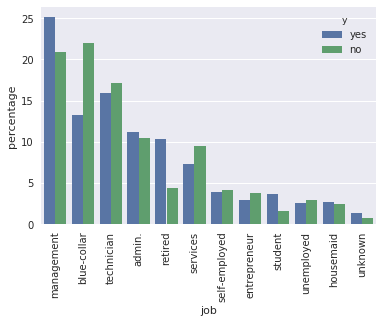

In [164]:
job_count = (data.groupby(['y'])['job'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('percentage',ascending=False))
p = sns.barplot(x="job", y="percentage", hue="y", data=job_count)
job_plot = plt.setp(p.get_xticklabels(), rotation=90)

#g=sns.countplot(x=data['job'],hue=data['y'])
#job = g.set_xticklabels(g.get_xticklabels(),rotation=90)

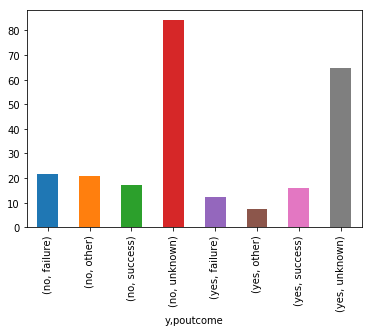

In [75]:
round((data['job'].value_counts(sort=True))*100/len(data),2).plot(kind='bar')


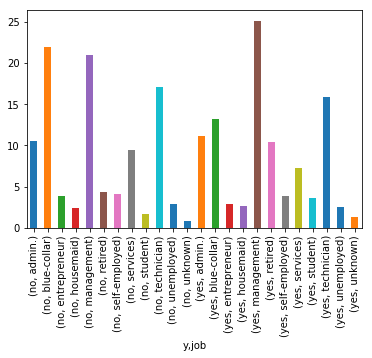

In [93]:
round(data_gp['job'].value_counts(sort=False,normalize=True)*100,2).plot(kind='bar')

In [82]:
help(plot)

Help on FramePlotMethods in module pandas.plotting._core object:

class FramePlotMethods(BasePlotMethods)
 |  DataFrame plotting accessor and method
 |  
 |  Examples
 |  --------
 |  >>> df.plot.line()
 |  >>> df.plot.scatter('x', 'y')
 |  >>> df.plot.hexbin()
 |  
 |  These plotting methods can also be accessed by calling the accessor as a
 |  method with the ``kind`` argument:
 |  ``df.plot(kind='line')`` is equivalent to ``df.plot.line()``
 |  
 |  Method resolution order:
 |      FramePlotMethods
 |      BasePlotMethods
 |      pandas.core.base.PandasObject
 |      pandas.core.base.StringMixin
 |      pandas.core.accessor.DirNamesMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __call__(self, x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=None, use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, font

In [115]:



sns.barplot(x=data[col_cat],y=data['y'].unique())

NameError: name 'count' is not defined

In [38]:
logreg =LogisticRegression()

In [46]:
x_train, x_test, y_train, y_test = train_test_split(data[['age','balance','day','duration','campaign','pdays','previous']], data['y'], test_size=0.25, random_state=0)

In [56]:
logreg.fit(x_train,y_train)
prediction = logreg.predict(x_test)

In [61]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, prediction)
print(cm)

[[973  20]
 [111  27]]


In [62]:
score=logreg.score(x_test,y_test)*100
print(f'Accuracy of logistic model {round(score,2)}%')

Accuracy of logistic model 88.42%
